## Scraping the website to get latitude and longitude

In [1]:
import requests
from bs4 import BeautifulSoup

import pandas as pd

Creating list of districts

In [2]:
dist_li = []

In [3]:
URL = 'https://indiamapia.com/Indore.html'
page = requests.get(URL)

In [4]:
page.status_code

200

In [5]:
soup = BeautifulSoup(page.content, 'html.parser')
#print(soup.prettify())

In [6]:
div = soup.findAll('div', attrs={'class': 'table-responsive'})

In [7]:
#print(div)#findAll("div", {"class": "stylelistrow"})

In [8]:
len(div)

2

In [9]:
#div[1]

In [10]:
district_data = []

for row in div[1].find_all('tr'):
    for cell in row.find_all('td'):
        #print(cell.text,end ='')
        district_data.append(cell.text)
        break

In [11]:
#print(district_data)

In [12]:
#print(district_data[0])

we have to create the url in this way in order to get the required data:-https://indiamapia.com/Indore/Adhyaksha_Jila_Upbhokta_Forum_Azad_Nagar.html

In [13]:
#place -> Neighborhood
#Tehsil/ Taluka -> Borough
column_names = ['PIN Code','Borough','Neighborhood','Latitude','Longitude']
neighborhoods = pd.DataFrame(columns=column_names)

In [14]:
#district_data[40]

Collecting all the data

In [15]:
for j in range(0,len(district_data)):
    if(j != 40):
        final_list = []
        str1 = district_data[j]
        listr1 = str1.split(' ')
        #print(listr1)
        str2 = ''
        #print(len(listr1))
        for i in range(0,len(listr1)):
            if i != (len(listr1)-1):
                str2 = str2 + listr1[i] + '_'
            else:
                str2 = str2 + listr1[i] + '.html'
        urlnew = 'https://indiamapia.com/Indore/' + str2
        #print(urlnew)


        page = requests.get(urlnew)

        #print(page.status_code)

        soup2 = BeautifulSoup(page.content, 'html.parser')
        #print(soup2.prettify())

        div2 = soup2.findAll('div', attrs={'class': 'col-xs-12 col-sm-4 col-md-4 col-lg-4'})
        #print(len(div2))

        #we will use div[1]
        for row in div2[1].find_all('tr'):
            for cell in row.find_all('td'):
                #print(cell.text,end ='')
                final_list.append(cell.text)


        li2 = []
        for i in range(0,len(final_list)):
            if ( (final_list[i] != '\nPlace :\n') and (final_list[i] != '\nPIN Code\n') and (final_list[i] != '\nDistrict :\n') and (final_list[i] != '\nTehsil/ Taluka :\n') and (final_list[i] != '\nState :\n') and (final_list[i] != '\nMadhya Pradesh\n')  and (final_list[i] != '\nLatitude :\n')  and (final_list[i] != '\nLongitude :\n')  ):
                li2.append(final_list[i].replace('\n',''))

        li2.remove('Indore')

        neighborhoods = neighborhoods.append({'PIN Code': li2[1],
                                                  'Borough': li2[2],
                                                  'Neighborhood': li2[0],
                                                  'Latitude': li2[3],
                                                  'Longitude': li2[4]}, ignore_index=True)

In [16]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(neighborhoods)   

    PIN Code   Borough                                       Neighborhood  \
0     452044    Indore           Adhyaksha Jila Upbhokta Forum Azad Nagar   
1     453115  Depalpur                                               Agra   
2     453551    Sanwer                                              Ajnod   
3     453111  Depalpur                                             Alwasa   
4     453441      Mhow                                        Ambachandan   
5     452006    Indore                                  Army Head Quarter   
6     453115  Depalpur                                           Attahada   
7     453001  Depalpur                                             Atwada   
8     453001  Depalpur                                         Aurangpura   
9     453220  Depalpur                                           Bachhoda   
10    453441      Mhow                                           Badgonda   
11    453551    Sanwer                                       Badodia Khan   

In [17]:
neighborhoods

,PIN Code,Borough,Neighborhood,Latitude,Longitude
0,452044,Indore,Adhyaksha Jila Upbhokta Forum Azad Nagar,22.72707,75.86652
1,453115,Depalpur,Agra,22.850004,75.549996
2,453551,Sanwer,Ajnod,22.98412,75.83652
3,453111,Depalpur,Alwasa,22.850006,75.549994
4,453441,Mhow,Ambachandan,22.5524482,75.7565163
...,...,...,...,...,...
184,453771,Indore,Todi,22.7195727,75.8577218
185,453331,Mhow,Umaria,22.6121063,75.7765377
186,452003,Indore,Vallabhnagar,22.7284907,75.8729906
187,452010,Indore,Vijay Nagar,22.66215,75.9035


##### Their is a row in which the pin code is replaced by indore city's information.We will drop this row

In [18]:
neighborhoods.drop(neighborhoods[neighborhoods['PIN Code'] == 'Indore'].index, inplace = True) 

Lets look at our dataset that we have created

In [20]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(neighborhoods)
    

    PIN Code   Borough                                       Neighborhood  \
0     452044    Indore           Adhyaksha Jila Upbhokta Forum Azad Nagar   
1     453115  Depalpur                                               Agra   
2     453551    Sanwer                                              Ajnod   
3     453111  Depalpur                                             Alwasa   
4     453441      Mhow                                        Ambachandan   
5     452006    Indore                                  Army Head Quarter   
6     453115  Depalpur                                           Attahada   
7     453001  Depalpur                                             Atwada   
8     453001  Depalpur                                         Aurangpura   
9     453220  Depalpur                                           Bachhoda   
10    453441      Mhow                                           Badgonda   
11    453551    Sanwer                                       Badodia Khan   

Lets check the datatype of our dataset's coloumn

In [21]:
neighborhoods.dtypes

PIN Code        object
Borough         object
Neighborhood    object
Latitude        object
Longitude       object
dtype: object

In [22]:
neighborhoods.reset_index()

,index,PIN Code,Borough,Neighborhood,Latitude,Longitude
0,0,452044,Indore,Adhyaksha Jila Upbhokta Forum Azad Nagar,22.72707,75.86652
1,1,453115,Depalpur,Agra,22.850004,75.549996
2,2,453551,Sanwer,Ajnod,22.98412,75.83652
3,3,453111,Depalpur,Alwasa,22.850006,75.549994
4,4,453441,Mhow,Ambachandan,22.5524482,75.7565163
...,...,...,...,...,...,...
183,184,453771,Indore,Todi,22.7195727,75.8577218
184,185,453331,Mhow,Umaria,22.6121063,75.7765377
185,186,452003,Indore,Vallabhnagar,22.7284907,75.8729906
186,187,452010,Indore,Vijay Nagar,22.66215,75.9035


Changing the datatype of the Latitude and Longitude column to float64 for future use

In [23]:
neighborhoods.Latitude=neighborhoods.Latitude.astype('float64')

In [24]:
neighborhoods.Longitude=neighborhoods.Longitude.astype('float64')

In [25]:
neighborhoods.dtypes

PIN Code         object
Borough          object
Neighborhood     object
Latitude        float64
Longitude       float64
dtype: object

##### Adding one more entry in dataset
Rajwada is a historical palace in Indore city.Many travellers comes here to see different structures and monuments.<br>
I have added this place because i live in this area only :)

In [26]:
neighborhoods = neighborhoods.append({'PIN Code': '452007',
                                                  'Borough': 'Indore',
                                                  'Neighborhood': 'Rajwada',
                                                  'Latitude': 22.7177,
                                                  'Longitude': 75.8545}, ignore_index=True)


In [27]:
neighborhoods

,PIN Code,Borough,Neighborhood,Latitude,Longitude
0,452044,Indore,Adhyaksha Jila Upbhokta Forum Azad Nagar,22.727070,75.866520
1,453115,Depalpur,Agra,22.850004,75.549996
2,453551,Sanwer,Ajnod,22.984120,75.836520
3,453111,Depalpur,Alwasa,22.850006,75.549994
4,453441,Mhow,Ambachandan,22.552448,75.756516
...,...,...,...,...,...
184,453331,Mhow,Umaria,22.612106,75.776538
185,452003,Indore,Vallabhnagar,22.728491,75.872991
186,452010,Indore,Vijay Nagar,22.662150,75.903500
187,453661,Mhow,Yashwant Nagar,22.394120,75.629080


#### Importing all the libraries that we will be using in this project

In [28]:
import numpy as np # library to handle data in a vectorized manner

import json # library to handle JSON files

#!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [29]:
latitude_indore = 22.7196

longitude_indore = 75.8577

#### Creating the Map with markers

In [30]:
map_indore = folium.Map(location=[latitude_indore, longitude_indore], zoom_start=10)

# add markers to map
for lat, lng, borough, Neighbourhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(Neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_indore)  
    
map_indore

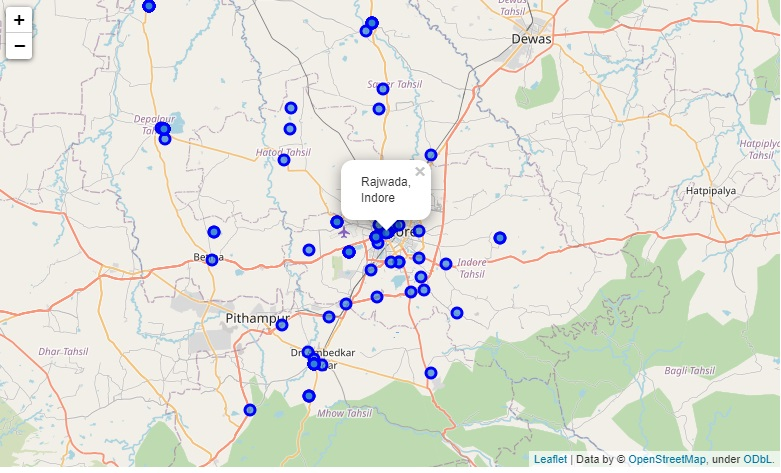

I have used the image format to show the image.Although the map that i have created have many features and you can interact with it

## Defining Foursquare API credentials

For security reasons i am removing my credentials

In [35]:
CLIENT_ID = '#' # your Foursquare ID
CLIENT_SECRET = '#' # your Foursquare Secret
VERSION = '20191225' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: #
CLIENT_SECRET:#


As Foursquare provide only a limited number of calls per day we will be using LIMIT = 100

In [32]:
# defining radius and limit of venues to get
radius=500
LIMIT=100

### Using the Foursquare API to get nearby venues

In [33]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [34]:
indore_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

Adhyaksha Jila Upbhokta Forum Azad Nagar
Agra
Ajnod
Alwasa
Ambachandan
Army Head Quarter
Attahada
Atwada
Aurangpura
Bachhoda
Badgonda
Badodia Khan
Bai
Baloda Tkun
Banadia
Baoliakhurd
Barlai Jagir
Betma
Bhagana
Bhagora
Bhanwrasala
Bhatkhedi
Bhilbadoli
Bicholi Mardana
Bijasan Road
Binawda
Burankhedi
Chadoda
Chairman M.P.PSC Residency Area
Chambal
Chittoda
Choral
Chordia
Collector Moti Tabela
Commandant APTC
Commandant CSWT BSF
Commissioner Central Excise Manik Bag Road
Commissioner Income Tax Residency Area
Commissioner Moti Bunlow MG Road Bhopal
Commissioner Nagar Nigam
Dakachia
Datoda
Depalpur
Dhannad
Dharnaka
Dudhia
Farkodha
Fc Ganj
Gandhinagar
Gautampura
Gawlipalasia
Girota
Gokulpur
Gujarkheda
Guran
Gurunanak Chauk
Harsola
Hasalpur
Hatod
I.D.A. Racecourse Road
Incharge Zila Rojgar Karjalaya Palsikar Colony
Indore Cat
Indore CGO Complex
Indore City-2
Indore Cloth Market
Indore Collectorate
Indore Courts
Indore DDU Nagar
Indore Govt. College
Indore Industrial Area
Indore Javeri Bagh
In

In [36]:
indore_venues.head(10)

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adhyaksha Jila Upbhokta Forum Azad Nagar,22.727070,75.866520,Holkar Cricket Stadium,22.725510,75.865948,Stadium
1,Adhyaksha Jila Upbhokta Forum Azad Nagar,22.727070,75.866520,Rajat Jewellers,22.727303,75.864240,Jewelry Store
2,Adhyaksha Jila Upbhokta Forum Azad Nagar,22.727070,75.866520,Laal Balti ki Kachori,22.727952,75.863276,Snack Place
3,Ambachandan,22.552448,75.756516,YES Bank ATM,22.552400,75.756500,Bank
4,Ambachandan,22.552448,75.756516,Mhow - Cantt Garden,22.552531,75.758263,Garden
5,Ambachandan,22.552448,75.756516,Office Bus Stop,22.548346,75.757362,Bus Station
6,Army Head Quarter,22.728250,75.845300,Nagori Mishtan Bhandar,22.727966,75.846022,Dessert Shop
7,Badgonda,22.552445,75.756519,YES Bank ATM,22.552400,75.756500,Bank
8,Badgonda,22.552445,75.756519,Mhow - Cantt Garden,22.552531,75.758263,Garden
9,Badgonda,22.552445,75.756519,Office Bus Stop,22.548346,75.757362,Bus Station


In [37]:
indore_venues.size

2240

In [38]:
indore_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Adhyaksha Jila Upbhokta Forum Azad Nagar,3,3,3,3,3,3
Ambachandan,3,3,3,3,3,3
Army Head Quarter,1,1,1,1,1,1
Badgonda,3,3,3,3,3,3
Bai,3,3,3,3,3,3
...,...,...,...,...,...,...
State Bank of Indore Yashwant Road,3,3,3,3,3,3
Tihi,2,2,2,2,2,2
Tillorbujurg,4,4,4,4,4,4


#### Analyzing neighbourhood

We will be using one hot encoding

In [39]:
# one hot encoding
indore_onehot = pd.get_dummies(indore_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
indore_onehot['Neighbourhood'] = indore_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [indore_onehot.columns[-1]] + list(indore_onehot.columns[:-1])
indore_onehot.head()

,ATM,Art Gallery,Bank,Bus Station,Cafeteria,Café,Chinese Restaurant,Coffee Shop,Dessert Shop,Diner,...,Office,Paper / Office Supplies Store,Restaurant,Shopping Mall,Smoke Shop,Snack Place,Stadium,Tourist Information Center,Train Station,Neighbourhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Adhyaksha Jila Upbhokta Forum Azad Nagar
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Adhyaksha Jila Upbhokta Forum Azad Nagar
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,Adhyaksha Jila Upbhokta Forum Azad Nagar
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Ambachandan
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Ambachandan


In [40]:
indore_onehot.shape

(320, 35)

In [41]:
indore_grouped = indore_onehot.groupby('Neighbourhood').mean().reset_index()
indore_grouped

,Neighbourhood,ATM,Art Gallery,Bank,Bus Station,Cafeteria,Café,Chinese Restaurant,Coffee Shop,Dessert Shop,...,Multiplex,Office,Paper / Office Supplies Store,Restaurant,Shopping Mall,Smoke Shop,Snack Place,Stadium,Tourist Information Center,Train Station
0,Adhyaksha Jila Upbhokta Forum Azad Nagar,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.333333,0.333333,0.00,0.0
1,Ambachandan,0.0,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0
2,Army Head Quarter,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0
3,Badgonda,0.0,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0
4,Bai,0.0,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,State Bank of Indore Yashwant Road,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.333333,0.333333,0.00,0.0
90,Tihi,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0
91,Tillorbujurg,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.25,0.0
92,Todi,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.25,0.0


Most frequent places visited area wise

In [42]:
num_top_venues = 5

for hood in indore_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = indore_grouped[indore_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adhyaksha Jila Upbhokta Forum Azad Nagar----
           venue  freq
0  Jewelry Store  0.33
1        Stadium  0.33
2    Snack Place  0.33
3            ATM  0.00
4      Multiplex  0.00


----Ambachandan----
                           venue  freq
0                           Bank  0.33
1                    Bus Station  0.33
2                         Garden  0.33
3                            ATM  0.00
4  Paper / Office Supplies Store  0.00


----Army Head Quarter----
                           venue  freq
0                   Dessert Shop   1.0
1  Paper / Office Supplies Store   0.0
2             Light Rail Station   0.0
3                         Market   0.0
4                       Mountain   0.0


----Badgonda----
                           venue  freq
0                           Bank  0.33
1                    Bus Station  0.33
2                         Garden  0.33
3                            ATM  0.00
4  Paper / Office Supplies Store  0.00


----Bai----
                           v

In [43]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [44]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = indore_grouped['Neighbourhood']

for ind in np.arange(indore_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(indore_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adhyaksha Jila Upbhokta Forum Azad Nagar,Stadium,Snack Place,Jewelry Store,Train Station,Coffee Shop,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Diner,Dessert Shop
1,Ambachandan,Bank,Bus Station,Garden,Train Station,Diner,Gym,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Coffee Shop
2,Army Head Quarter,Dessert Shop,Train Station,Gym,Garden,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Diner,Coffee Shop,Tourist Information Center
3,Badgonda,Bank,Bus Station,Garden,Train Station,Diner,Gym,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Coffee Shop
4,Bai,Bank,Bus Station,Garden,Train Station,Diner,Gym,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Coffee Shop


In [45]:
#neighbourhoods_venues_sorted.loc[neighbourhoods_venues_sorted.Neighbourhood == 'Rajwada']

### K-mean Clustering

In [46]:
# set number of clusters
kclusters = 5

indore_grouped_clustering = indore_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(indore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 2, 3, 2, 2, 4, 2, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2,
       1, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2,
       0, 0, 2, 3, 0, 4, 0, 2, 2, 2, 3, 1, 2, 2, 3, 2, 2, 2, 2, 4, 0, 0,
       0, 2, 0, 1, 3, 0, 4, 1, 4, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4,
       0, 1, 3, 0, 0, 3])

In [47]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_)

indore_merged = neighborhoods

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
indore_merged = indore_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighborhood')

indore_merged.head() # check the last columns!

,PIN Code,Borough,Neighborhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,452044,Indore,Adhyaksha Jila Upbhokta Forum Azad Nagar,22.727070,75.866520,1.0,Stadium,Snack Place,Jewelry Store,Train Station,Coffee Shop,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Diner,Dessert Shop
1,453115,Depalpur,Agra,22.850004,75.549996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,453551,Sanwer,Ajnod,22.984120,75.836520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,453111,Depalpur,Alwasa,22.850006,75.549994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,453441,Mhow,Ambachandan,22.552448,75.756516,2.0,Bank,Bus Station,Garden,Train Station,Diner,Gym,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Coffee Shop


In [49]:
#indore_merged.loc[indore_merged.Neighborhood == 'Rajwada']

In [50]:
indore_merged=indore_merged.dropna()

In [51]:
indore_merged.Cluster_Labels = indore_merged.Cluster_Labels.astype(int)

In [52]:
# create map
map_clusters = folium.Map(location=[latitude_indore, longitude_indore], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(indore_merged['Latitude'], indore_merged['Longitude'], indore_merged['Neighborhood'], indore_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

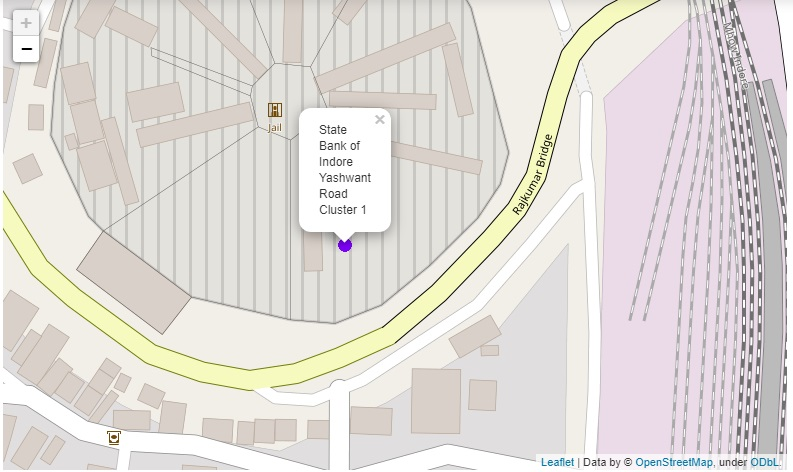

I have zoomed in to the maximum extent in order to show you one of the cluster.Although thier are 5 clusters and they are spreaded over indore,pithampur,depalpur,sawer, and mhow

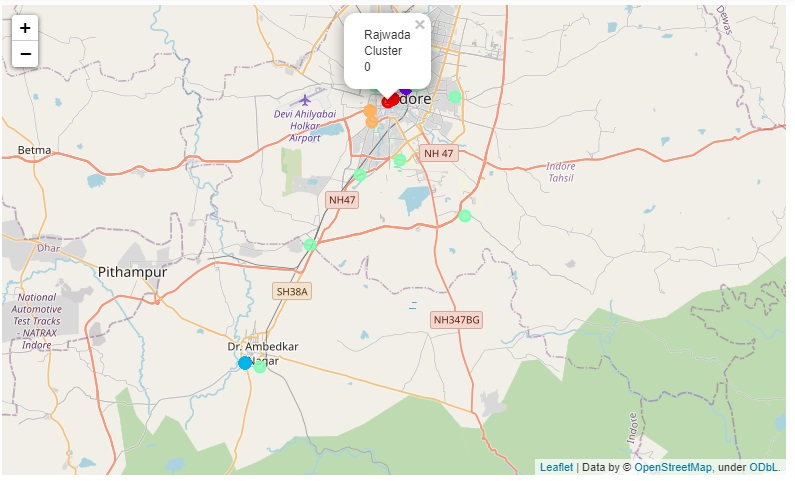

In [53]:
indore_merged 

,PIN Code,Borough,Neighborhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,452044,Indore,Adhyaksha Jila Upbhokta Forum Azad Nagar,22.727070,75.866520,1,Stadium,Snack Place,Jewelry Store,Train Station,Coffee Shop,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Diner,Dessert Shop
4,453441,Mhow,Ambachandan,22.552448,75.756516,2,Bank,Bus Station,Garden,Train Station,Diner,Gym,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Coffee Shop
5,452006,Indore,Army Head Quarter,22.728250,75.845300,3,Dessert Shop,Train Station,Gym,Garden,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Diner,Coffee Shop,Tourist Information Center
10,453441,Mhow,Badgonda,22.552445,75.756519,2,Bank,Bus Station,Garden,Train Station,Diner,Gym,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Coffee Shop
12,453441,Mhow,Bai,22.552440,75.756524,2,Bank,Bus Station,Garden,Train Station,Diner,Gym,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Coffee Shop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,453331,Mhow,Tihi,22.627550,75.800850,3,Hotel,Light Rail Station,Dessert Shop,Garden,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Diner,Coffee Shop,Historic Site
181,452020,Indore,Tillorbujurg,22.719581,75.857714,0,Historic Site,Fast Food Restaurant,Tourist Information Center,Dessert Shop,Gym,Garden,Furniture / Home Store,Food & Drink Shop,Diner,Train Station
183,453771,Indore,Todi,22.719573,75.857722,0,Historic Site,Fast Food Restaurant,Tourist Information Center,Dessert Shop,Gym,Garden,Furniture / Home Store,Food & Drink Shop,Diner,Train Station
185,452003,Indore,Vallabhnagar,22.728491,75.872991,3,Indian Restaurant,Furniture / Home Store,Fast Food Restaurant,Restaurant,Market,Train Station,Dessert Shop,Food & Drink Shop,Diner,Coffee Shop


### Checking the cluster

In [54]:
indore_merged.loc[indore_merged['Cluster_Labels'] == 0, indore_merged.columns[[1] + list(range(5, indore_merged.shape[1]))]]

,Borough,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,Indore,0,Historic Site,Fast Food Restaurant,Tourist Information Center,Dessert Shop,Gym,Garden,Furniture / Home Store,Food & Drink Shop,Diner,Train Station
40,Indore,0,Historic Site,Fast Food Restaurant,Tourist Information Center,Dessert Shop,Gym,Garden,Furniture / Home Store,Food & Drink Shop,Diner,Train Station
41,Indore,0,Historic Site,Fast Food Restaurant,Tourist Information Center,Dessert Shop,Gym,Garden,Furniture / Home Store,Food & Drink Shop,Diner,Train Station
62,Indore,0,Historic Site,Fast Food Restaurant,Tourist Information Center,Dessert Shop,Gym,Garden,Furniture / Home Store,Food & Drink Shop,Diner,Train Station
63,Indore,0,Historic Site,Fast Food Restaurant,Tourist Information Center,Dessert Shop,Gym,Garden,Furniture / Home Store,Food & Drink Shop,Diner,Train Station
64,Indore,0,Historic Site,Fast Food Restaurant,Tourist Information Center,Dessert Shop,Gym,Garden,Furniture / Home Store,Food & Drink Shop,Diner,Train Station
65,Indore,0,Historic Site,Fast Food Restaurant,Tourist Information Center,Dessert Shop,Gym,Garden,Furniture / Home Store,Food & Drink Shop,Diner,Train Station
66,Indore,0,Historic Site,Fast Food Restaurant,Tourist Information Center,Dessert Shop,Gym,Garden,Furniture / Home Store,Food & Drink Shop,Diner,Train Station
67,Indore,0,Historic Site,Fast Food Restaurant,Tourist Information Center,Dessert Shop,Gym,Garden,Furniture / Home Store,Food & Drink Shop,Diner,Train Station
69,Indore,0,Historic Site,Fast Food Restaurant,Tourist Information Center,Dessert Shop,Gym,Garden,Furniture / Home Store,Food & Drink Shop,Diner,Train Station


In [55]:
indore_merged.loc[indore_merged['Cluster_Labels'] == 1, indore_merged.columns[[1] + list(range(5, indore_merged.shape[1]))]]

,Borough,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Indore,1,Stadium,Snack Place,Jewelry Store,Train Station,Coffee Shop,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Diner,Dessert Shop
28,Indore,1,Stadium,Snack Place,Jewelry Store,Train Station,Coffee Shop,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Diner,Dessert Shop
33,Indore,1,Stadium,Snack Place,Jewelry Store,Train Station,Coffee Shop,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Diner,Dessert Shop
34,Indore,1,Stadium,Snack Place,Jewelry Store,Train Station,Coffee Shop,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Diner,Dessert Shop
35,Indore,1,Stadium,Snack Place,Jewelry Store,Train Station,Coffee Shop,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Diner,Dessert Shop
36,Indore,1,Stadium,Snack Place,Jewelry Store,Train Station,Coffee Shop,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Diner,Dessert Shop
37,Indore,1,Stadium,Snack Place,Jewelry Store,Train Station,Coffee Shop,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Diner,Dessert Shop
38,Indore,1,Stadium,Snack Place,Jewelry Store,Train Station,Coffee Shop,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Diner,Dessert Shop
39,Indore,1,Stadium,Snack Place,Jewelry Store,Train Station,Coffee Shop,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Diner,Dessert Shop
59,Indore,1,Stadium,Snack Place,Jewelry Store,Train Station,Coffee Shop,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Diner,Dessert Shop


In [56]:
indore_merged.loc[indore_merged['Cluster_Labels'] == 2, indore_merged.columns[[1] + list(range(5, indore_merged.shape[1]))]]

,Borough,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Mhow,2,Bank,Bus Station,Garden,Train Station,Diner,Gym,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Coffee Shop
10,Mhow,2,Bank,Bus Station,Garden,Train Station,Diner,Gym,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Coffee Shop
12,Mhow,2,Bank,Bus Station,Garden,Train Station,Diner,Gym,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Coffee Shop
19,Mhow,2,Bank,Bus Station,Garden,Train Station,Diner,Gym,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Coffee Shop
31,Mhow,2,Bank,Bus Station,Garden,Train Station,Diner,Gym,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Coffee Shop
32,Mhow,2,Bank,Bus Station,Garden,Train Station,Diner,Gym,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Coffee Shop
53,Mhow,2,Bank,Bus Station,Garden,Train Station,Diner,Gym,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Coffee Shop
56,Mhow,2,Bank,Bus Station,Garden,Train Station,Diner,Gym,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Coffee Shop
88,Mhow,2,Bank,Bus Station,Garden,Train Station,Diner,Gym,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Coffee Shop
98,Mhow,2,Bank,Bus Station,Garden,Train Station,Diner,Gym,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Coffee Shop


In [57]:
indore_merged.loc[indore_merged['Cluster_Labels'] == 3, indore_merged.columns[[1] + list(range(5, indore_merged.shape[1]))]]

,Borough,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Indore,3,Dessert Shop,Train Station,Gym,Garden,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Diner,Coffee Shop,Tourist Information Center
61,Indore,3,Multiplex,Diner,Train Station,Garden,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Dessert Shop,Coffee Shop,Historic Site
100,Indore,3,Coffee Shop,Shopping Mall,Indian Restaurant,Chinese Restaurant,Cafeteria,Gym,Bus Station,Café,Bank,Historic Site
114,Indore,3,Indian Restaurant,Train Station,Dessert Shop,Garden,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Diner,Coffee Shop,Historic Site
126,Mhow,3,Paper / Office Supplies Store,Train Station,Coffee Shop,Garden,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Diner,Dessert Shop,Chinese Restaurant
148,Indore,3,Train Station,Food & Drink Shop,ATM,Snack Place,Gym,Art Gallery,Bank,Bus Station,Cafeteria,Café
157,Indore,3,Hotel,Indian Restaurant,Restaurant,Office,Coffee Shop,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Diner,Dessert Shop
167,Indore,3,Mountain,Train Station,Dessert Shop,Garden,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Diner,Coffee Shop,Historic Site
180,Mhow,3,Hotel,Light Rail Station,Dessert Shop,Garden,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Diner,Coffee Shop,Historic Site
185,Indore,3,Indian Restaurant,Furniture / Home Store,Fast Food Restaurant,Restaurant,Market,Train Station,Dessert Shop,Food & Drink Shop,Diner,Coffee Shop


In [58]:
indore_merged.loc[indore_merged['Cluster_Labels'] == 4, indore_merged.columns[[1] + list(range(5, indore_merged.shape[1]))]]

,Borough,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Indore,4,Snack Place,Smoke Shop,Ice Cream Shop,Movie Theater,Train Station,Coffee Shop,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Diner
84,Indore,4,Snack Place,Smoke Shop,Ice Cream Shop,Movie Theater,Train Station,Coffee Shop,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Diner
107,Indore,4,Snack Place,Smoke Shop,Ice Cream Shop,Movie Theater,Train Station,Coffee Shop,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Diner
134,Indore,4,Snack Place,Smoke Shop,Ice Cream Shop,Movie Theater,Train Station,Coffee Shop,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Diner
152,Mhow,4,Dessert Shop,Art Gallery,Snack Place,Train Station,Garden,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Diner,Chinese Restaurant
171,Indore,4,Snack Place,Smoke Shop,Ice Cream Shop,Movie Theater,Train Station,Coffee Shop,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Diner
172,Indore,4,Snack Place,Smoke Shop,Ice Cream Shop,Movie Theater,Train Station,Coffee Shop,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Diner
